<a href="https://colab.research.google.com/github/pouriakouhzadeh/Crypto-forcast-by-LSTM/blob/master/Ada%20forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('ADAUSD.csv', date_parser = True)
# data.keys()
# data.columns=['Date', 'time', 'open', 'high', 'low','close','vlome']
data.dropna(subset = ["Close"], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
# Reverse rows using iloc() Function
data = data.iloc[::-1]
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume,Volume Base Asset,tradecount
22723,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11279,0.11368,0.11169,0.11222,19523,1.734808e+06,415
22722,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11218,0.11390,0.11218,0.11390,19002,1.681114e+06,395
22721,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11398,0.11504,0.11384,0.11419,23501,2.055462e+06,575
22720,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11410,0.11500,0.11351,0.11359,19314,1.692635e+06,401
22719,1.600000e+12,2020-08-26,ADAUSD_PERP,0.11354,0.11465,0.11189,0.11239,21487,1.899170e+06,450
...,...,...,...,...,...,...,...,...,...,...
4,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38270,0.38520,0.38240,0.38390,31728,8.269269e+05,867
3,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38380,0.38520,0.38120,0.38200,48105,1.255351e+06,1180
2,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38190,0.38300,0.38070,0.38190,58956,1.543282e+06,1193
1,1.680000e+12,2023-04-06,ADAUSD_PERP,0.38190,0.38320,0.38170,0.38310,27354,7.151011e+05,696


In [102]:
data_training = data[data['Date']< '2023-04-06'].copy()
data_test = data[data['Date']>= '2023-04-06'].copy()

training_data = data_training.drop(['Unix', 'Date','Symbol'], axis = 1)
training_data

 


,Open,High,Low,Close,Volume,Volume Base Asset,tradecount
22723,0.11279,0.11368,0.11169,0.11222,19523,1.734808e+06,415
22722,0.11218,0.11390,0.11218,0.11390,19002,1.681114e+06,395
22721,0.11398,0.11504,0.11384,0.11419,23501,2.055462e+06,575
22720,0.11410,0.11500,0.11351,0.11359,19314,1.692635e+06,401
22719,0.11354,0.11465,0.11189,0.11239,21487,1.899170e+06,450
...,...,...,...,...,...,...,...
28,0.39230,0.39480,0.39070,0.39340,71106,1.807687e+06,1864
27,0.39350,0.39380,0.39220,0.39240,36025,9.168526e+05,857
26,0.39250,0.39290,0.39120,0.39210,29808,7.605178e+05,756
25,0.39200,0.39320,0.39150,0.39260,29292,7.470845e+05,797


In [103]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01205937, 0.01210502, 0.01220523, ..., 0.00076609, 0.00895871,
        0.00245083],
       [0.01185733, 0.01217768, 0.01236962, ..., 0.00074521, 0.00868027,
        0.00232736],
       [0.01245351, 0.01255421, 0.01292654, ..., 0.00092554, 0.01062154,
        0.00343857],
       ...,
       [0.10470219, 0.10432775, 0.10597882, ..., 0.00117834, 0.00390628,
        0.00455595],
       [0.10453659, 0.10442684, 0.10607946, ..., 0.00115766, 0.00383662,
        0.00480906],
       [0.10470219, 0.10429472, 0.10624721, ..., 0.00071014, 0.00235823,
        0.00379662]])

In [105]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(21, training_data.shape[0]):
    X_train.append(training_data[i-21:i])
    Y_train.append(training_data[i,0])
     
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(22679, 21, 7)

In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 7)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 21, 50)            11600     
                                                                 
 dropout_24 (Dropout)        (None, 21, 50)            0         
                                                                 
 lstm_25 (LSTM)              (None, 21, 60)            26640     
                                                                 
 dropout_25 (Dropout)        (None, 21, 60)            0         
                                                                 
 lstm_26 (LSTM)              (None, 21, 80)            45120     
                                                                 
 dropout_26 (Dropout)        (None, 21, 80)            0         
                                                                 
 lstm_27 (LSTM)              (None, 120)              

In [107]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.2)

Epoch 1/20
363/363 [==============================] - 56s 118ms/step - loss: 0.0076 - val_loss: 6.1734e-05
Epoch 2/20
363/363 [==============================] - 42s 115ms/step - loss: 0.0028 - val_loss: 2.4133e-05
Epoch 3/20
363/363 [==============================] - 41s 112ms/step - loss: 0.0023 - val_loss: 4.9127e-04
Epoch 4/20
363/363 [==============================] - 41s 112ms/step - loss: 0.0021 - val_loss: 8.1668e-04
Epoch 5/20
363/363 [==============================] - 41s 112ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 6/20
363/363 [==============================] - 41s 112ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 7/20
363/363 [==============================] - 41s 112ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 8/20
363/363 [==============================] - 42s 115ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 9/20
363/363 [==============================] - 41s 112ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 10/20
363/363 [==============================] - 42

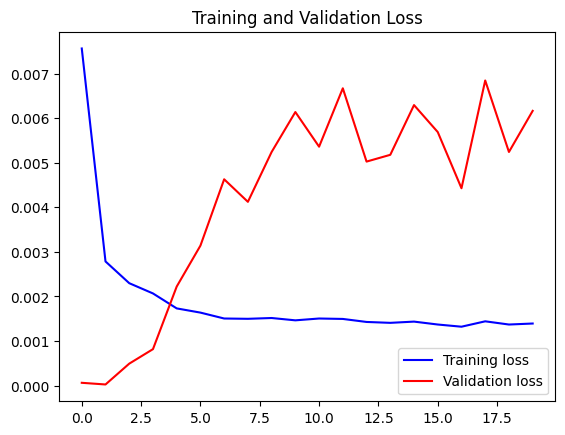

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [112]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Unix', 'Date','Symbol'], axis = 1)
df.head()

<ipython-input-112-36ee65349180>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume,Volume Base Asset,tradecount
0,0.3964,0.3975,0.3925,0.3945,144227,3647727.057,2909
1,0.3945,0.3975,0.3937,0.3949,149751,3789536.521,2855
2,0.3951,0.3955,0.3877,0.3878,172740,4418959.562,3398
3,0.3878,0.3892,0.3842,0.3848,182702,4727166.748,3403
4,0.3847,0.3850,0.3826,0.3837,133180,3469745.736,2708


In [131]:
inputs = scaler.transform(df)

In [132]:
X_test = []
Y_test = []
for i in range (21, inputs.shape[0]):
    X_test.append(inputs[i-21:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_pred = model.predict(X_test) 

2/2 [==============================] - 0s 26ms/step


In [133]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

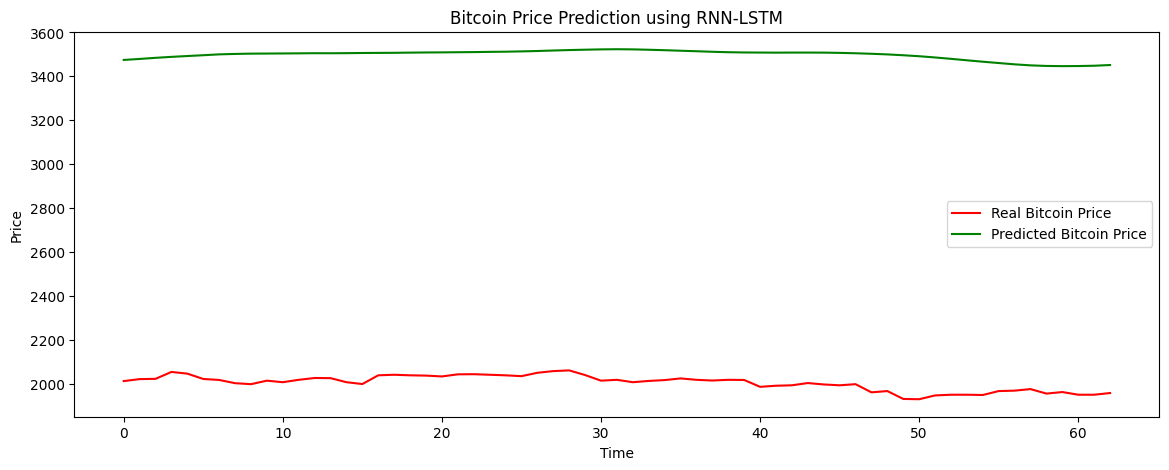

In [134]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()